In [23]:
import numpy as np
from numpy import random
import math
import time
import matplotlib.pylab as plt

# **Preparation of Algorithms**

## _**Define individual sorting algorithms**_

In [18]:
# def insertion_count(data, compObj):
#     for i in range(1, len(data)):
#         for j in range(i, 0, -1):
#             compObj.increase()
#             if data[j] < data[j-1]:
#                 data[j], data[j-1] = data[j-1], data[j]
#             else:
#                 break
#     return data

# INSERTION SORT - w/ counting of no. of comparisons
def insertion_count(data, compObj):
    for i in range(1,len(data)):
        curr = data[i]
        pos = i
        while pos > 0 and data[pos-1] > curr:
            compObj.increase()                  # compare data[pos-1] and curr
            data[pos] = data[pos-1]
            pos -= 1
        if data[pos-1] <= curr:                 # while loop stopped because of 2nd criteria
            compObj.increase()                # comparison still made whether success/fail, so must add 1
        data[pos] = curr
    return data

In [5]:
# MERGE SORT - w/ counting of no. of comparisons
def merge(sorted1, sorted2, compObj):
    list1 = sorted1
    list2 = sorted2
    i = j = 0
    newlist = []
    
    while i < len(list1) and j < len(list2):
        compObj.increase()
        if list1[i] < list2[j]:
            newlist.append(list1[i])
            i += 1
        elif list1[i] > list2[j]:
            newlist.append(list2[j])
            j += 1
            compObj.increase()
        else:
            newlist.append(list1[i])
            newlist.append(list2[j])
            i += 1
            j += 1
            compObj.increase()

    if i < len(list1):
        newlist.extend(list1[i:])
    else:
        newlist.extend(list2[j:])

    return newlist
    
def merge_sort(data, compObj):
    # Base Case
    if len(data) == 1:
        return data
    # Recursion
    elif len(data) > 1:
        mid = len(data)//2
        lower = data[:mid]
        upper = data[mid:]
        sorted1 = merge_sort(lower, compObj) #sorted 1 is a tuple (sorted lower list, number of comparisons for lower list)
        sorted2 = merge_sort(upper, compObj) #sorted 2 is a tuple (sorted upper list, number of comparisons for upper list)
        return merge(sorted1, sorted2, compObj)

## _**Class: Store Key Comparison across different functions**_

In [6]:
class KeyComp:
    """
    Class to store key comparisons
    """
    def __init__(self, comparisons=0):
        self.comparisons = comparisons
    
    def increase(self):
        self.comparisons += 1
    
    def get(self):
        return self.comparisons

## _**Function: Generate Random Dataset**_

In [7]:
def generate_data(size, upper_lim, lower_lim=0):
    """
    Generates array of integers of size 'size' in the range of [lower_lim, upper_lim)]

    Args:
        size: Size of array to be generated
        upper_lim: Upper limit of range
        lower_lim: Lower limit of range
    
    Returns:
        Generated array
    """
    
    return random.randint(low=lower_lim, high=upper_lim, size=size)

## _**Function: Time Taken + No. of Comparisons**_

In [8]:
def test_insertion(data, compObj):
    """
    Calculates number of comparisons and time taken by insertion sort to sort the given array
    """

    start_time = time.time()
    _ = insertion_count(data, compObj)
    insertion_time = time.time() - start_time

    return compObj.get(), insertion_time

In [9]:
def test_merge(data, compObj):
    """
    Calculates number of comparisons and time taken by mergesort to sort the given array
    """

    start_time = time.time()
    _ = merge_sort(data, compObj)
    merge_time = time.time() - start_time

    return compObj.get(), merge_time

Due to fluctuations caused by randomness of dataset, we should conduct multiple tests and obtain the average.

In [10]:
def insertion_merge_stats(iterations, all_sizes):
    """
    Retrieves statistics (i.e. number of comparisons and time taken) for insertion sort and merge sort for a range of sizes

    Args:
        iterations: Number of tests to be conducted for each size
        all_sizes: List of sizes to be tested

    Returns:
        insertion_comparison_array: Array of number of comparisons for each size for insertion sort
        insertion_time_array: Array of time taken for each size for insertion sort
        merge_comparison_array: Array of number of comparisons for each size for merge sort
        merge_time_array: Array of time taken for each size for merge
    """

    insertion_comparison_array = [0 for _ in range(len(all_sizes))]
    insertion_time_array = [0 for _ in range(len(all_sizes))]
    merge_comparison_array = [0 for _ in range(len(all_sizes))]
    merge_time_array = [0 for _ in range(len(all_sizes))]

    for i in range(len(all_sizes)):
        size = all_sizes[i]

        for _ in range(iterations): # conduct multiple tests to get average
            compInsert = KeyComp()
            compMerge = KeyComp()
            input_array1 = generate_data(size=size, upper_lim=1000)
            input_array2 = input_array1.copy()

            insertion_comparisons, insertion_time = test_insertion(input_array1, compInsert)
            merge_comparisons, merge_time = test_merge(input_array2, compMerge)

            insertion_comparison_array[i] += insertion_comparisons
            insertion_time_array[i] += insertion_time
            merge_comparison_array[i] += merge_comparisons
            merge_time_array[i] += merge_time
        
        insertion_comparison_array[i] //= iterations
        insertion_time_array[i] /= iterations
        merge_comparison_array[i] //= iterations
        merge_time_array[i] /= iterations
    
    return insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array

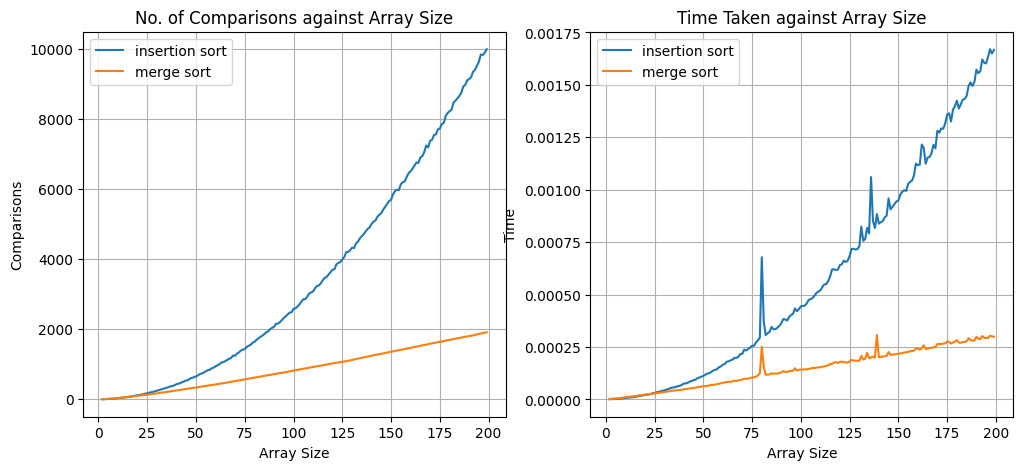

In [9]:
"""
    Plot insertion sort vs mergesort time and comparisons just for an easy visual representation of their efficiency
    -  size of array ranges from 2 to 100
    -  100 tests conducted for each size
"""

sizes = [i for i in range(2, 200)]
insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array = insertion_merge_stats(iterations=100, all_sizes=sizes)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)

axs[0].plot(sizes, insertion_comparison_array, label="insertion sort")
axs[0].plot(sizes, merge_comparison_array, label="merge sort")
axs[0].legend()
axs[0].set_title("No. of Comparisons against Array Size")
axs[0].set_xlabel("Array Size")
axs[0].set_ylabel("Comparisons")
axs[0].grid()

axs[1].plot(sizes, insertion_time_array, label = "insertion sort")
axs[1].plot(sizes, merge_time_array, label = "merge sort")
axs[1].legend()
axs[1].set_title("Time Taken against Array Size")
axs[1].set_xlabel("Array Size")
axs[1].set_ylabel("Time")
axs[1].grid()

---

# **Part a: Implementation of hybrid sorting algorithm**

In [11]:
def hybrid_sort(data, S, compObj):
    """
    Hybrid sorting algorithm that combines insertion sort and mergesort:
    Once the size of a subarray in a recursive call of Mergesort is less than or equal to S,
    the algorithm will switch to Insertion Sort, which is efficient for small-sized input

    Args:
        data: Array containing list of integers to be sorted
        S: Threshold value for switching to insertion sort
    
    Returns:
        merge(sorted1, sorted2): Merged sorted list of the input data
    """

    if len(data) <= S:
        return insertion_count(data, compObj)
    
    mid = len(data) // 2
    lower = data[:mid]
    upper = data[mid:]
    sorted1 = hybrid_sort(lower, S, compObj)
    sorted2 = hybrid_sort(upper, S, compObj)
    return merge(sorted1, sorted2, compObj)

In [12]:
def test_hybrid(data, S, compObj):
    """
    Calculates number of comparisons and time taken by hybrid sort to sort the given array
    """

    start_time = time.time()
    _ = hybrid_sort(data, S, compObj)
    hybrid_time = time.time() - start_time
    
    return compObj.get(), hybrid_time

# **Part c: Analyse Time Complexity** 

In [13]:
def hybrid_stats_size(iterations, all_sizes, S):
    """
    Retrieves statistics (i.e. number of comparisons and time taken) for hybrid sort for a range of sizes

    Args:
        iterations: Number of tests to be conducted for each size
        all_sizes: List of sizes to be tested
        S: Threshold value for switching to insertion sort

    Returns:
        hybrid_comparison_array: Array of number of comparisons for each size for hybrid sort
        hybrid_time_array: Array of time taken for each size for hybrid sort
    """

    hybrid_comparison_array = [0 for _ in range(len(all_sizes))]
    hybrid_time_array = [0 for _ in range(len(all_sizes))]

    for i in range(len(all_sizes)): # test for each size
        size = all_sizes[i]

        for iteration in range(iterations): # conduct multiple tests to get average
            compHybrid = KeyComp()
            input_array = generate_data(size=size, upper_lim=1000)
            hybrid_comparisons, hybrid_time = test_hybrid(input_array, S, compHybrid)

            hybrid_comparison_array[i] += hybrid_comparisons
            hybrid_time_array[i] += hybrid_time
        
        hybrid_comparison_array[i] //= iterations
        hybrid_time_array[i] /= iterations

        print(f"Size: {size}")
        print(f"Number of comparisons: {hybrid_comparison_array[i]}")
        print(f"Time taken: {hybrid_time_array[i]}\n")
    
    return hybrid_comparison_array, hybrid_time_array

In [14]:
def hybrid_stats_S(iterations, size, all_S):
    """
    Retrieves statistics (i.e. number of comparisons and time taken) for hybrid sort for a range of S values

    Args:
        iterations: Number of tests to be conducted for each size
        size: Size of array to be sorted
        all_S: List of S values to be tested

    Returns:
        hybrid_comparison_array: Array of number of comparisons for each size for hybrid sort
        hybrid_time_array: Array of time taken for each size for hybrid sort
    """

    hybrid_comparison_array = [0 for _ in range(len(all_S))]
    hybrid_time_array = [0 for _ in range(len(all_S))]

    for i in range(len(all_S)): # test for each size
        S = all_S[i]

        for iteration in range(iterations): # conduct multiple tests to get average
            compHybrid = KeyComp()
            input_array = generate_data(size=size, upper_lim=1000)
            hybrid_comparisons, hybrid_time = test_hybrid(input_array, S, compHybrid)

            hybrid_comparison_array[i] += hybrid_comparisons
            hybrid_time_array[i] += hybrid_time
        
        hybrid_comparison_array[i] //= iterations
        hybrid_time_array[i] /= iterations

        print(f"S = {S}")
        print(f"Number of comparisons: {hybrid_comparison_array[i]}")
        print(f"Time taken: {hybrid_time_array[i]}\n")
    
    return hybrid_comparison_array, hybrid_time_array

## _**c(i): Fixed value of S**_
Fixed <u>S = 20</u>, varying list size. Only each power of 10 interval from 1000 to 10 million is plotted.

Size: 1000
Number of comparisons: 12915
Time taken: 0.003161716461181641

Size: 10000
Number of comparisons: 174021
Time taken: 0.03405914306640625

Size: 100000
Number of comparisons: 2000907
Time taken: 0.24341635704040526

Size: 1000000
Number of comparisons: 23753963
Time taken: 2.8895577430725097

Size: 10000000
Number of comparisons: 276213599
Time taken: 34.959446382522586



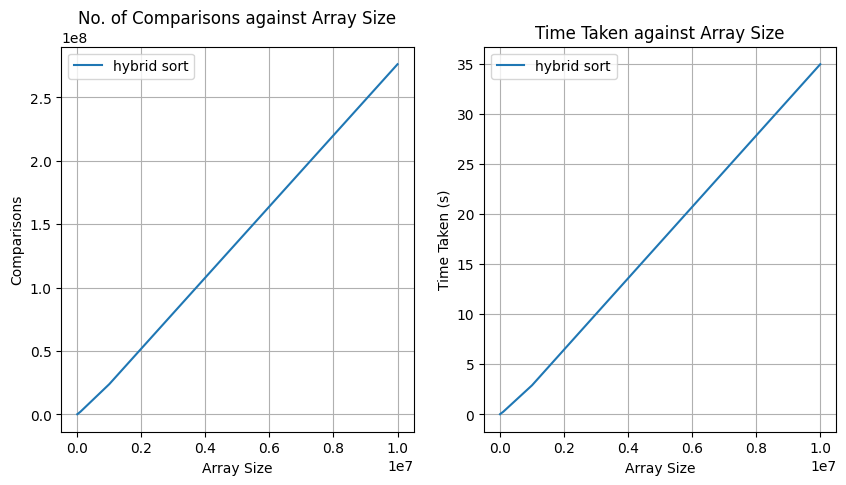

In [14]:
"""
    Plot change in no. of comparisons and time taken with a fixed value of S
    -  array size ranges from 1000 to 10 million (each power of 10 only)
    -  5 tests conducted for each size
"""


fixed_S = 20
hybrid_sizes = [int(1000 * math.pow(10, i)) for i in range(5)] # array sizes range from 1000 to 10 million

hybrid1_comparison_array, hybrid1_time_array = hybrid_stats_size(iterations=5, all_sizes=hybrid_sizes, S=fixed_S)

# Plot
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

axs[0].plot(hybrid_sizes, hybrid1_comparison_array, label="hybrid sort")
axs[0].legend()
axs[0].set_title("No. of Comparisons against Array Size")
axs[0].set_xlabel("Array Size")
axs[0].set_ylabel("Comparisons")
axs[0].grid()

axs[1].plot(hybrid_sizes, hybrid1_time_array, label="hybrid sort")
axs[1].legend()
axs[1].set_title("Time Taken against Array Size")
axs[1].set_xlabel("Array Size")
axs[1].set_ylabel("Time Taken (s)")
axs[1].grid()

## _**c(ii): Fixed value of list size**_
Fixed <u>size = 100000</u>, varying S. Comparisons and time taken for each value of S in [2,100] is plotted

S = 2
Number of comparisons: 2009888
Time taken: 0.2525931835174561

S = 3
Number of comparisons: 1984186
Time taken: 0.24286227226257323

S = 4
Number of comparisons: 1982413
Time taken: 0.2509912014007568

S = 5
Number of comparisons: 1982875
Time taken: 0.23748092651367186

S = 6
Number of comparisons: 1967042
Time taken: 0.23501381874084473

S = 7
Number of comparisons: 1965171
Time taken: 0.24332733154296876

S = 8
Number of comparisons: 1965144
Time taken: 0.23462605476379395

S = 9
Number of comparisons: 1965435
Time taken: 0.23613977432250977

S = 10
Number of comparisons: 1965517
Time taken: 0.23868756294250487

S = 11
Number of comparisons: 1965491
Time taken: 0.23421087265014648

S = 12
Number of comparisons: 1992886
Time taken: 0.2514148235321045

S = 13
Number of comparisons: 2001338
Time taken: 0.25277047157287597

S = 14
Number of comparisons: 2001460
Time taken: 0.27013397216796875

S = 15
Number of comparisons: 2001467
Time taken: 0.2721378326416016

S = 16
Number of c

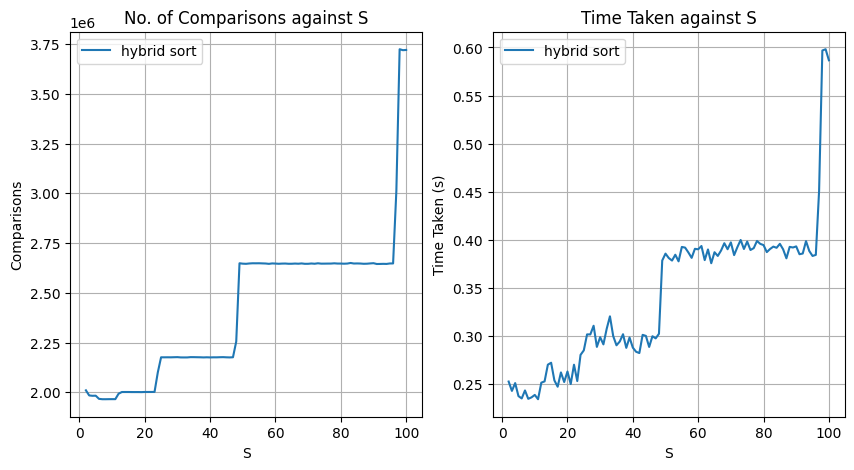

In [15]:
"""
    Plot change in no. of comparisons and time taken using hybrid sort with varying values of S
    -  array size fixed at 100k
    -  S ranges from 2 to 100
    -  5 tests conducted for each size
"""

fixed_size = 100000
S_array = [i for i in range(2, 101)]

hybrid2_comparison_array, hybrid2_time_array = hybrid_stats_S(5, fixed_size, S_array)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
axs[0].plot(S_array, hybrid2_comparison_array, label="hybrid sort")
axs[0].legend()
axs[0].set_title("No. of Comparisons against S")
axs[0].set_xlabel("S")
axs[0].set_ylabel("Comparisons")
axs[0].grid()
axs[1].plot(S_array, hybrid2_time_array, label="hybrid sort")
axs[1].legend()
axs[1].set_title("Time Taken against S")
axs[1].set_xlabel("S")
axs[1].set_ylabel("Time Taken (s)")
axs[1].grid()

## _**c(iii): Optimal Value of S**_
The purpose of a hybrid sorting algorithm is to get the best of both worlds with insertion sort and mergesort. 

Although the time complexity of mergesort is generally better than insertion sort, insertion sort has better performance with smaller input array sizes. This is the appeal of the hybrid sorting algorithm over mergesort alone. 

Thus, finding the optimal value of S can be essentially to find the <u>array size at which insertion sort begins to perform more poorly than mergesort</u>. This can be found by plotting the performance of insertion sort and mergesort and finding the intersection point. 
 

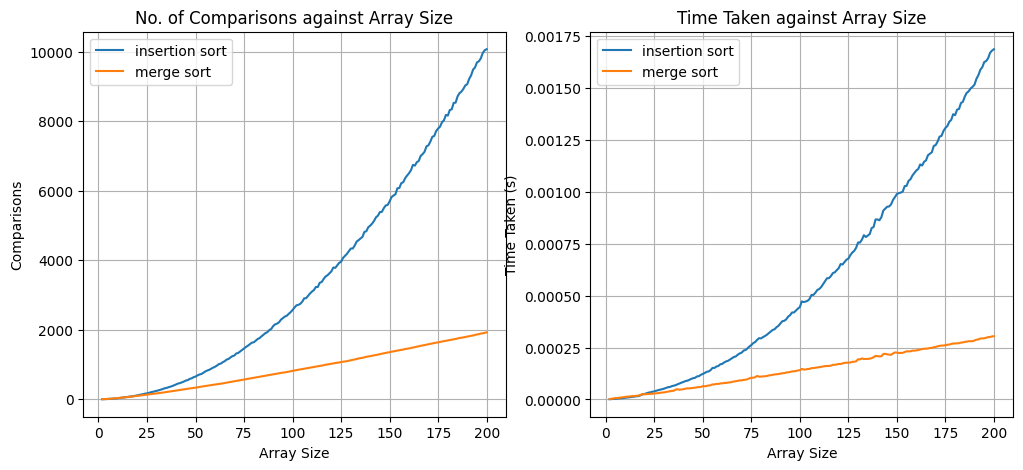

In [21]:
"""
    Plot change in no. of comparisons and time taken using insertion sort and mergesort with varying array size
    -  array size ranges from [2, 200]
    -  100 tests conducted for each size
"""

all_sizes = [i for i in range(2, 201)]
insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array = insertion_merge_stats(100, all_sizes)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axs[0].plot(all_sizes, insertion_comparison_array, label = "insertion sort")
axs[0].plot(all_sizes, merge_comparison_array, label = "merge sort")
axs[0].legend()
axs[0].set_title("No. of Comparisons against Array Size")
axs[0].set_xlabel("Array Size")
axs[0].set_ylabel("Comparisons")
axs[0].grid()
axs[1].plot(all_sizes, insertion_time_array, label = "insertion sort")
axs[1].plot(all_sizes, merge_time_array, label = "merge sort")
axs[1].legend()
axs[1].set_title("Time Taken against Array Size")
axs[1].set_xlabel("Array Size")
axs[1].set_ylabel("Time Taken (s)")
axs[1].grid()

Since the intersection point clearly occurs at a very low value of S, we will replot the graphs using a much smaller range of array sizes

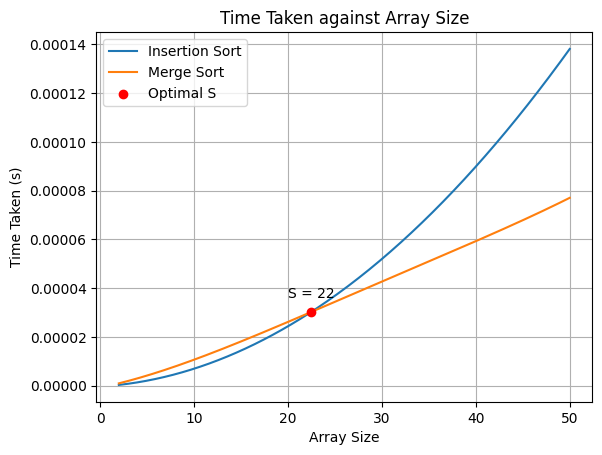

In [26]:
"""
    Plot change in no. of comparisons and time taken using insertion sort and mergesort with varying array size
    -  array size ranges from [2, 50]
    -  5000 tests conducted for each size
    -  last intersect between two lines marked for each graph
"""

all_sizes = [i for i in range(2, 51)]
insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array = insertion_merge_stats(5000, all_sizes)

# Convert lists to NumPy arrays
all_sizes = np.array(all_sizes)
insertion_time_array = np.array(insertion_time_array)
merge_time_array = np.array(merge_time_array)
insertion_comparison_array = np.array(insertion_comparison_array)
merge_comparison_array = np.array(merge_comparison_array)

# Fit best-fit polynomial curves (degree can be adjusted as needed)
poly_degree = 4
coeffs_insertion = np.polyfit(all_sizes, insertion_time_array, poly_degree)
poly_insertion = np.poly1d(coeffs_insertion)
coeffs_merge = np.polyfit(all_sizes, merge_time_array, poly_degree)
poly_merge = np.poly1d(coeffs_merge)

# Generate a smooth set of x values for plotting the polynomial curves
xnew = np.linspace(all_sizes.min(), all_sizes.max(), 300)
smooth_insertion_time = poly_insertion(xnew)
smooth_merge_time = poly_merge(xnew)

# Find intersection points
diffTime = insertion_time_array - merge_time_array
sign_changeT = np.where(np.diff(np.sign(diffTime)))[0]  # indices where sign changes
diffComp = insertion_comparison_array - merge_comparison_array
sign_changeC = np.where(np.diff(np.sign(diffComp)))[0]  # indices where sign changes

# intersect_time = []
# for i in sign_changeT:
#     # Linear interpolation to approximate intersection
#     x1, x2 = all_sizes[i], all_sizes[i + 1]
#     y1, y2 = insertion_time_array[i], insertion_time_array[i + 1]
#     y3, y4 = merge_time_array[i], merge_time_array[i + 1]

#     # Solve for x where the two line segments intersect
#     x_intersect = x1 + (x2 - x1) * (y1 - y3) / ((y1 - y3) - (y2 - y4))
#     y_intersect = np.interp(x_intersect, [x1, x2], [y1, y2])

#     intersect_time.append([x_intersect, y_intersect])

# Calculate intersection points using the smooth curves
diff_smooth = smooth_insertion_time - smooth_merge_time
# Find indices where the sign changes in the difference
sign_change_indices = np.where(np.diff(np.sign(diff_smooth)))[0]
intersect_points = []
for i in sign_change_indices:
    # Use two adjacent points from the smooth curves for interpolation
    x1, x2 = xnew[i], xnew[i+1]
    y1_ins, y2_ins = smooth_insertion_time[i], smooth_insertion_time[i+1]
    y1_merge, y2_merge = smooth_merge_time[i], smooth_merge_time[i+1]
    # Linear interpolation to approximate the intersection x-coordinate:
    x_intersect = x1 + (x2 - x1) * (y1_ins - y1_merge) / ((y1_ins - y1_merge) - (y2_ins - y2_merge))
    # Interpolate the y-coordinate (should be nearly equal for both curves)
    y_intersect = np.interp(x_intersect, [x1, x2], [y1_ins, y2_ins])
    intersect_points.append((x_intersect, y_intersect))

fig, axs = plt.subplots(1, 1)
# axs.plot(all_sizes, insertion_time_array, label = "insertion sort")
# axs.plot(all_sizes, merge_time_array, label = "merge sort")
axs.plot(xnew, smooth_insertion_time, label="Insertion Sort")
axs.plot(xnew, smooth_merge_time, label="Merge Sort")
for timeX, timeY in intersect_points:
# timeX, timeY = intersect_time[-1]
    axs.scatter(timeX, timeY, color='red', zorder=3, label="Optimal S")
    axs.annotate(f"S = {int(timeX)}", (timeX, timeY),
                    textcoords="offset points", xytext=(0,10), ha='center')
handles, labels = axs.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
axs.legend(lgd.values(), lgd.keys())
axs.set_title("Time Taken against Array Size")
axs.set_xlabel("Array Size")
axs.set_ylabel("Time Taken (s)")
axs.grid()

S = 2
Number of comparisons: 12493
Time taken: 0.0017954349517822266

S = 3
Number of comparisons: 12455
Time taken: 0.0019797801971435545

S = 4
Number of comparisons: 12285
Time taken: 0.0016982555389404297

S = 5
Number of comparisons: 12275
Time taken: 0.0016667366027832032

S = 6
Number of comparisons: 12271
Time taken: 0.0016658306121826172

S = 7
Number of comparisons: 12240
Time taken: 0.001665496826171875

S = 8
Number of comparisons: 12231
Time taken: 0.0016860485076904297

S = 9
Number of comparisons: 12242
Time taken: 0.0016901016235351563

S = 10
Number of comparisons: 12240
Time taken: 0.0016855239868164063

S = 11
Number of comparisons: 12242
Time taken: 0.0016908645629882812

S = 12
Number of comparisons: 12227
Time taken: 0.001685953140258789

S = 13
Number of comparisons: 12244
Time taken: 0.0016844749450683593

S = 14
Number of comparisons: 12242
Time taken: 0.0016856670379638671

S = 15
Number of comparisons: 12471
Time taken: 0.0017449378967285157

S = 16
Number of

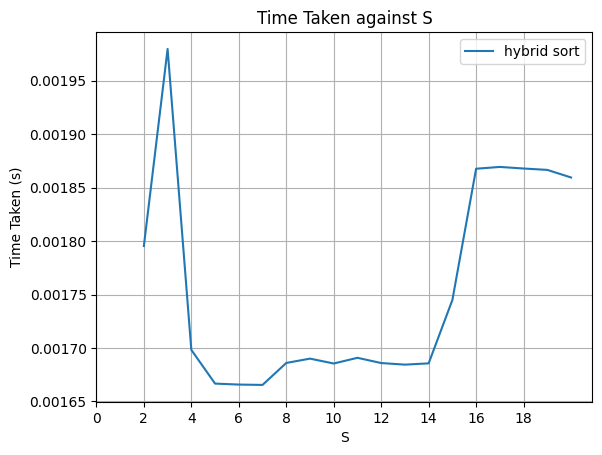

In [18]:
"""
    Using a fixed array size, show the performance of the optimal S value
"""

all_S = [i for i in range(2, 21)]
hybrid_comparison_array, hybrid_time_array = hybrid_stats_S(5, 1000, all_S)

fig, axs = plt.subplots(1, 1)
axs.plot(all_S, hybrid_time_array, label='hybrid sort')
axs.legend()
axs.xaxis.set_ticks(np.arange(0, 20, 2))
axs.set_title("Time Taken against S")
axs.set_xlabel("S")
axs.set_ylabel("Time Taken (s)")
axs.grid()

# **Part d: Compare with Original Mergesort**
From part c(iii), <u>S = 9</u> is the optimal value of S. We will now compare hybrid sort with S = 9 against normal mergesort

In [27]:
"""
    Plot no. of comparisons and time taken using hybrid sort vs mergesort
    -  array size of 10 million
    -  5 tests conducted for each size
    -  Optimal S value of S = 11
"""

cmp_size = int(math.pow(10, 7)) # array of size 10 million
iterations = 5
S = 11

total_hybridComp, total_mergeComp = 0,0
total_hybridTime, total_mergeTime = 0.0, 0.0

for i in range(iterations):
    input_array1 = generate_data(size=cmp_size, upper_lim=1000)
    input_array2 = input_array1.copy()
    compHybrid = KeyComp()
    compMerge = KeyComp()
        
    hybrid_comparisons, hybrid_time = test_hybrid(input_array1, S, compHybrid)
    merge_comparisons, merge_time = test_merge(input_array2, compMerge)
    
    total_hybridComp += hybrid_comparisons
    total_hybridTime += hybrid_time
    total_mergeComp += merge_comparisons
    total_mergeTime += merge_time

    print(f"Iteration {i+1} done")

avg_hybridComp, avg_mergeComp = total_hybridComp // iterations, total_mergeComp // iterations
avg_hybridTime, avg_mergeTime = total_hybridTime / iterations, total_mergeTime / iterations

Iteration 1 done
Iteration 2 done
Iteration 3 done
Iteration 4 done
Iteration 5 done


Hybrid Sort Comparisons: 265202978
Merge Sort Comparisons: 270336816
Hybrid Sort Time: 37.317314052581786
Merge Sort Time: 40.795612239837645


Text(0, 0.5, 'Time Taken (s)')

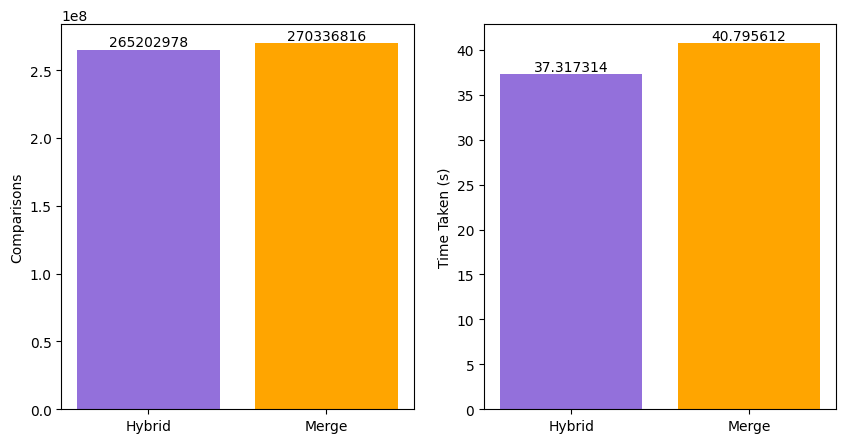

In [28]:
print(f"Hybrid Sort Comparisons: {avg_hybridComp}")
print(f"Merge Sort Comparisons: {avg_mergeComp}")
print(f"Hybrid Sort Time: {avg_hybridTime}")
print(f"Merge Sort Time: {avg_mergeTime}")

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
c = axs[0].bar(["Hybrid", "Merge"], [avg_hybridComp, avg_mergeComp], color=['mediumpurple', 'orange'])
axs[0].bar_label(c, fmt='%d')
axs[0].set_ylabel("Comparisons")
t = axs[1].bar(["Hybrid", "Merge"], [avg_hybridTime, avg_mergeTime], color=['mediumpurple', 'orange'])
axs[1].bar_label(t, fmt='%f')
axs[1].set_ylabel("Time Taken (s)")